In [22]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
pd.options.mode.chained_assignment = None
%matplotlib inline 
RND_STATE = 45123

### 1. Loading data

In [12]:
data = pd.read_csv("data/tree_addhealth.csv")
data.columns = map(str.upper, data.columns)
data.describe()

,BIO_SEX,HISPANIC,WHITE,BLACK,NAMERICAN,ASIAN,AGE,TREG1,ALCEVR1,ALCPROBS1,...,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
count,6503.00000,6481.000000,6485.000000,6485.000000,6485.000000,6485.000000,4837.000000,6500.000000,6444.000000,6504.000000,...,6483.000000,6454.000000,6504.000000,6448.000000,6368.000000,6274.000000,6486.000000,6504.000000,6477.000000,6369.000000
mean,1.51607,0.114643,0.662143,0.249653,0.036392,0.041635,16.541548,0.197692,0.552452,0.403598,...,40.822459,1.600248,0.101015,2.744882,28.275597,2.802080,0.046099,22.163069,6.113942,13.356100
std,0.49978,0.318615,0.473016,0.432846,0.187277,0.199768,1.581993,0.398289,0.497280,0.950048,...,5.425218,2.596134,0.301371,3.519701,5.184204,0.767025,0.209716,3.413224,3.368731,2.154971
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,12.676712,0.000000,0.000000,0.000000,...,10.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,3.000000
25%,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,15.257534,0.000000,0.000000,0.000000,...,38.000000,0.000000,0.000000,0.000000,25.000000,2.250000,0.000000,21.300000,4.000000,12.000000
50%,2.00000,0.000000,1.000000,0.000000,0.000000,0.000000,16.512329,0.000000,1.000000,0.000000,...,40.000000,0.000000,0.000000,2.000000,29.000000,2.750000,0.000000,23.300000,6.000000,14.000000
75%,2.00000,0.000000,1.000000,0.000000,0.000000,0.000000,17.761644,0.000000,1.000000,0.000000,...,45.000000,2.000000,0.000000,4.000000,32.000000,3.500000,0.000000,24.300000,8.000000,15.000000
max,2.00000,1.000000,1.000000,1.000000,1.000000,1.000000,21.934247,1.000000,1.000000,6.000000,...,50.000000,19.000000,1.000000,27.000000,38.000000,4.000000,1.000000,25.000000,18.000000,15.000000


### 2. Data preprocessing

#### 2.1 Removing nans

In [13]:
data_clean = data.dropna()

#### 2.2 Splitting train and target data

In [14]:
predvar = data_clean[['BIO_SEX','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'AGE','ALCEVR1','ALCPROBS1','MAREVER1','COCEVER1','INHEVER1','CIGAVAIL','DEP1',
'ESTEEM1','VIOL1','PASSIST','DEVIANT1','SCHCONN1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']]

target = data_clean.GPA1

#### 2.3 Scaling data

Recoding sex variable 

In [5]:
recode = {1:1, 2:0}
data_clean['BIO_SEX'] = data_clean['BIO_SEX'].map(recode)

Scaling all variables to range [0, 1]

In [9]:
predictors=predvar.copy()

In [10]:
predictors['BIO_SEX']=preprocessing.scale(predictors['BIO_SEX'].astype('float64'))
predictors['HISPANIC']=preprocessing.scale(predictors['HISPANIC'].astype('float64'))
predictors['WHITE']=preprocessing.scale(predictors['WHITE'].astype('float64'))
predictors['NAMERICAN']=preprocessing.scale(predictors['NAMERICAN'].astype('float64'))
predictors['ASIAN']=preprocessing.scale(predictors['ASIAN'].astype('float64'))
predictors['AGE']=preprocessing.scale(predictors['AGE'].astype('float64'))
predictors['ALCEVR1']=preprocessing.scale(predictors['ALCEVR1'].astype('float64'))
predictors['ALCPROBS1']=preprocessing.scale(predictors['ALCPROBS1'].astype('float64'))
predictors['MAREVER1']=preprocessing.scale(predictors['MAREVER1'].astype('float64'))
predictors['COCEVER1']=preprocessing.scale(predictors['COCEVER1'].astype('float64'))
predictors['INHEVER1']=preprocessing.scale(predictors['INHEVER1'].astype('float64'))
predictors['CIGAVAIL']=preprocessing.scale(predictors['CIGAVAIL'].astype('float64'))
predictors['DEP1']=preprocessing.scale(predictors['DEP1'].astype('float64'))
predictors['ESTEEM1']=preprocessing.scale(predictors['ESTEEM1'].astype('float64'))
predictors['VIOL1']=preprocessing.scale(predictors['VIOL1'].astype('float64'))
predictors['PASSIST']=preprocessing.scale(predictors['PASSIST'].astype('float64'))
predictors['DEVIANT1']=preprocessing.scale(predictors['DEVIANT1'].astype('float64'))
predictors['SCHCONN1']=preprocessing.scale(predictors['SCHCONN1'].astype('float64'))
predictors['EXPEL1']=preprocessing.scale(predictors['EXPEL1'].astype('float64'))
predictors['FAMCONCT']=preprocessing.scale(predictors['FAMCONCT'].astype('float64'))
predictors['PARACTV']=preprocessing.scale(predictors['PARACTV'].astype('float64'))
predictors['PARPRES']=preprocessing.scale(predictors['PARPRES'].astype('float64'))

### 3. Making train test split

In [16]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size=.3, random_state=RND_STATE)

### 4. Fitting LassoLarsCV

In [18]:
model = LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

Selected regression coefs:

In [19]:
dict(zip(predictors.columns, model.coef_))

{'AGE': -0.047899838649582846,
 'ALCEVR1': -0.022669568323173812,
 'ALCPROBS1': 0.012514144635282397,
 'ASIAN': 0.036786626682389752,
 'BIO_SEX': -0.10008522200858336,
 'BLACK': -0.16395338974760088,
 'CIGAVAIL': -0.035807503185830196,
 'COCEVER1': -0.016915939977295909,
 'DEP1': -0.03095504297769212,
 'DEVIANT1': -0.012247769677489268,
 'ESTEEM1': 0.037942416425403101,
 'EXPEL1': -0.011820642651017357,
 'FAMCONCT': -0.01031206161018937,
 'HISPANIC': -0.052658419566695903,
 'INHEVER1': 0.017433045536981707,
 'MAREVER1': -0.059720092611406948,
 'NAMERICAN': -0.011620523254124665,
 'PARACTV': 0.095459788735029472,
 'PARPRES': 0.0018292225651474205,
 'PASSIST': -0.063935061191172426,
 'SCHCONN1': 0.11586479257938785,
 'VIOL1': -0.084303535620602235,
 'WHITE': 0.0}

Plotting coefficient progression

Text(0.5,1,'Regression Coefficients Progression for Lasso Paths')

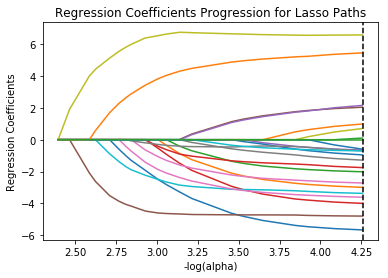

In [23]:
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

Plotting MSE for each fold

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Mean squared error on each fold')

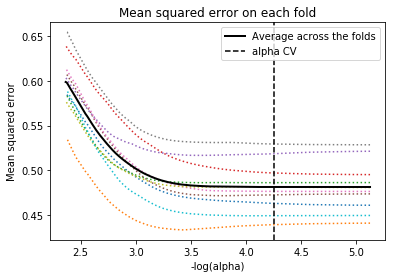

In [47]:
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.mse_path_, ':')
plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

MSE from training and test data

In [49]:
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print('training data MSE', train_error)
print('test data MSE', test_error)

training data MSE 0.473352755862
test data MSE 0.462008061824


R-square from training and test data

In [50]:
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print('training data R-square', rsquared_train)
print('test data R-square', rsquared_test)

training data R-square 0.208850928224
test data R-square 0.204190123696
